<a href="https://colab.research.google.com/github/rikkucl/stochastic_weak_discrete_gradient/blob/feat_1%2F27/Nesterov_svrg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

最小二乗法の解:[[4.18621861]
 [2.68863612]]
平滑性パラメータ L: 21978.45747449925
学習したパラメータ: [[[4.18621616 4.18621617]]

 [[2.68863816 2.68863815]]]


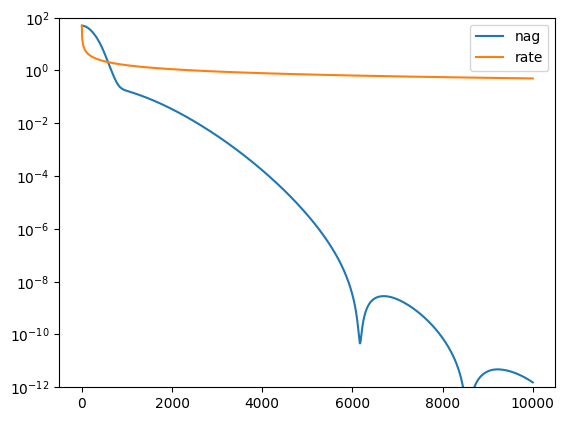

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# データ生成
np.random.seed(40)
m = 10 ** 4
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + 10 * np.random.randn(m, 1)

X_b = np.c_[np.ones((m, 1)), X]  # Xにバイアス列を追加

# 最小二乗解の計算
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print(f"最小二乗法の解:{theta_best}")

A = X_b.T @ X_b  # X^T X を計算

# 平滑性パラメータ（最大固有値の計算）
L = np.linalg.eigvalsh(A).max()  # 固有値を計算して最大値を取得

print(f"平滑性パラメータ L: {L}")

theta = np.array([0, 0])
theta_c = np.array([0.0, 0.0], dtype=np.float64)
v = np.array([0, 0])
z = np.array([0, 0])
# ハイパーパラメータ
learning_rate = 1
n_iterations = 10 ** 2
j_iterations = 10 ** 2
m = len(y)
err = []
ite = []
rate = []
rate_chi = []
a_k_ = 1

chi = 20

for j in range(j_iterations):
  full_gradient = np.array([0.0, 0.0])  # フロート型の初期値を明示
  for k in range(m):
    x_k = X[k].item()  # スカラーに変換
    y_k = y[k].item()  # スカラーに変換
    full_gradient = full_gradient + np.array([2 * (x_k * theta[1] + theta[0] - y_k),2 * x_k * (x_k * theta[1] + theta[0] - y_k)])
  full_gradient /= m
  theta_pre = theta
  for iteration in range(n_iterations):
    random_index = np.random.randint(m)
    xi = X[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    a_k = a_k_
    a_k_ = a_k_ + ((iteration + 2) + j * n_iterations) ** (chi - 1)
    b_k = ( (a_k_ - a_k) * (iteration + 1  + j * n_iterations + 2 ) ** (1/2) + ((L/2) * (a_k_ - a_k) ** 2) / a_k_ ) / 2
    z = theta + ((a_k_ - a_k) / a_k_) * (v - theta)
    # 勾配の計算
    gradient = np.array([ 2 * ( xi * z[1] + z[0] - yi ), 2 * xi * ( xi * z[1] + z[0] - yi )]) - np.array([ 2 * ( xi * theta_pre[1] + theta_pre[0] - yi ), 2 * xi * ( xi * theta_pre[1] + theta_pre[0] - yi )]) + full_gradient

    # パラメタの更新
    v_ = v - ((a_k_ - a_k) / (4 * b_k)) * gradient
    theta_ = (a_k / a_k_) * theta + ( (a_k_ - a_k)/(a_k_)) * v_
    theta = theta_

    v = v_

    loss = np.mean(((theta_best[1] * X + theta_best[0]) - (theta[1] * X + theta[0])) ** 2)
    err.append(loss)


    ite.append(iteration + j * n_iterations + 1)

    # レートのプロット
    rate.append( err[0] / (iteration + 1 + j * n_iterations) ** (1/2))


# 結果の表示
print("学習したパラメータ:", theta)

plt.plot(ite, err, label="nag")
plt.plot(ite, rate, label="rate")

ax = plt.gca()
ax.set_yscale("log")
# ax.set_ylim(1e-12, 1e+2)
plt.legend()
plt.show()

